In [1]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math as m
from fun_genSingleDrop import *

In [11]:
grav = 9.807e3;         # gravitational acceleration [mm/s^2]
delta_rho = 1e-3;        # density difference [10^6 kg/m^3]
gamma=70
R0=0.9

beta=delta_rho*grav*R0**2/gamma
print(beta)

# initial some parameters

x,z,phi,s=0,0,0,0
s_span=(0,5)

# define the differential equaitons
def Young_Laplace(s,y,sigma,rneedle):
    beta=delta_rho*grav*rneedle**2/sigma
    epsilon=0.0000001
    phi,r,z=y

    dphi_ds=2-beta*z-m.sin(phi+epsilon)/(r+epsilon)
    dr_ds=m.cos(phi)
    dz_ds=m.sin(phi)
    #dV_ds=m.pi*x**2*m.sin(phi)
    return np.array([dphi_ds,dr_ds,dz_ds])

rneedle=1
init0=([0,0,0])
for sigma in np.arange(10,100,5):

    sol=solve_ivp(Young_Laplace,s_span,init0,dense_output=True,max_step=0.001,args=(sigma,rneedle))
    s=np.linspace(0,4,3000)
    y=sol.sol(s)

    plt.plot(y[1],y[2])
    plt.axis('equal')

plt.show()


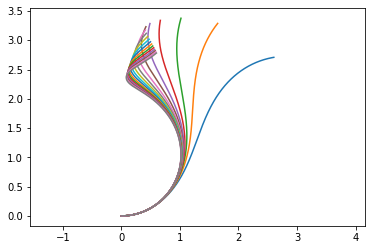